# Assignment 4
# Customer Segmentation Analysis

# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Loading the dataset

In [3]:
ds=pd.read_csv(r"E:\4-1\Nalaya Thiran\Mall_Customers.csv")

In [4]:
display(ds.head())
display(ds.tail())
print('shape:',ds.shape)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


shape: (200, 5)


# 2.Visualizations
# uni-variate Analysis

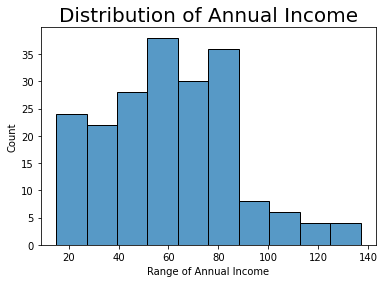

In [5]:
sns.histplot(ds['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

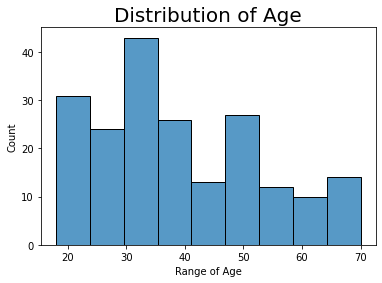

In [6]:
sns.histplot(ds['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

# bi-variate Analysis

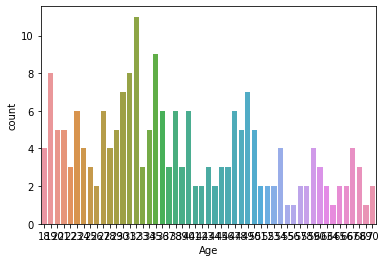

In [7]:
sns.countplot(x=ds['Age'])
plt.show()

Female    112
Male       88
Name: Gender, dtype: int64


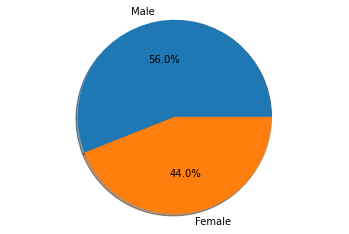

In [8]:
labels = ['Male','Female']
sizes = ds['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# Multi-variate Analysis

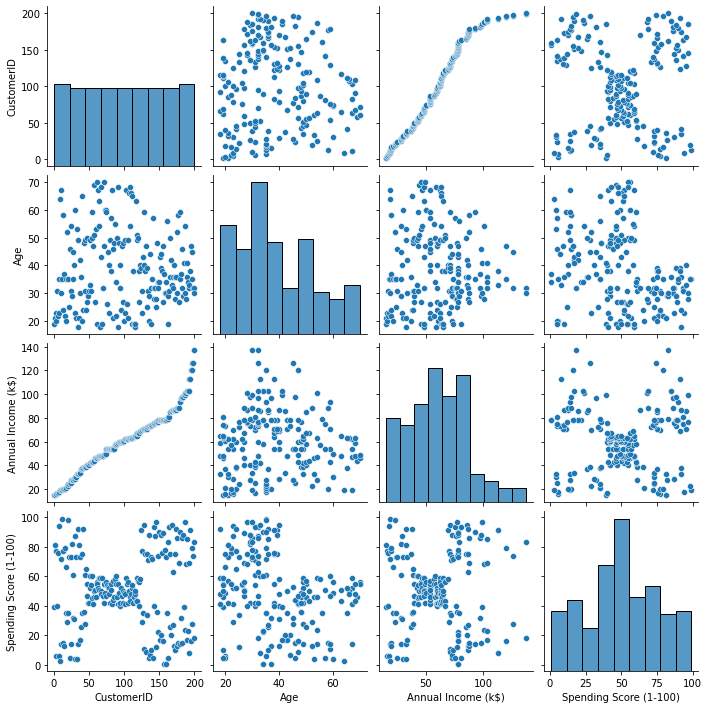

In [9]:
sns.pairplot(ds)

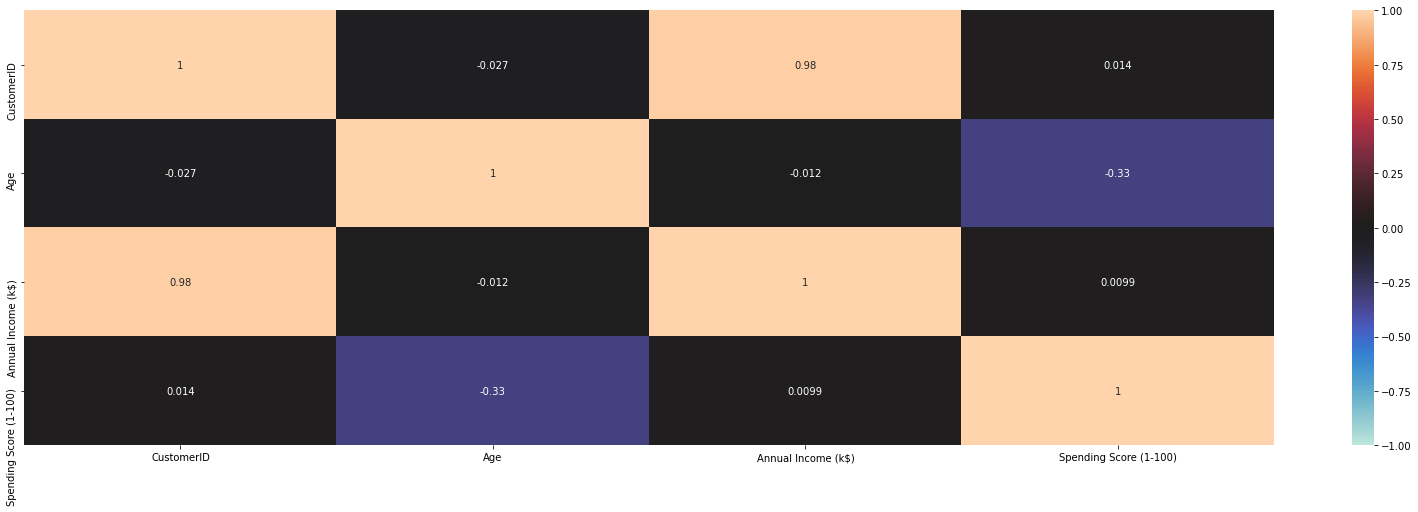

In [10]:
plt.figure(figsize=(28,8))
corr=ds.corr()
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, center= 0);

# 3. Descriptive Statistics

In [11]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 4.Handling missing value

In [12]:
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values found

# 5.Finding and Handling the outliers

<AxesSubplot:xlabel='Age'>

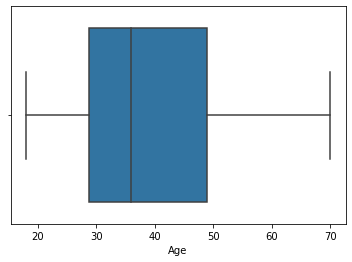

In [13]:
sns.boxplot(x=ds['Age'])

<AxesSubplot:xlabel='Annual Income (k$)'>

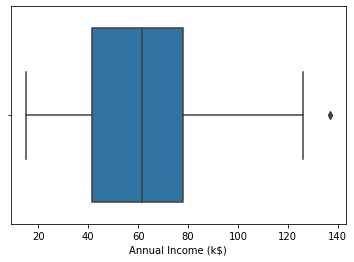

In [14]:
sns.boxplot(x=ds['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

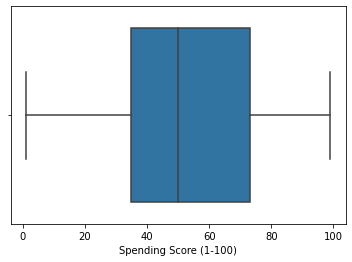

In [15]:
sns.boxplot(x=ds['Spending Score (1-100)'])

<AxesSubplot:>

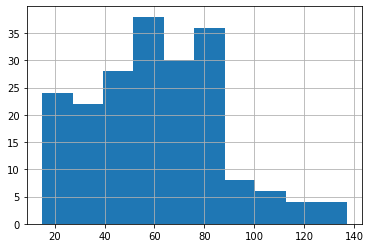

In [16]:
ds['Annual Income (k$)'].hist()

In [17]:
print('skewness value of Annual Income (k$): ',ds['Annual Income (k$)'].skew())

skewness value of Annual Income (k$):  0.3218425498619055


<AxesSubplot:xlabel='Annual Income (k$)'>

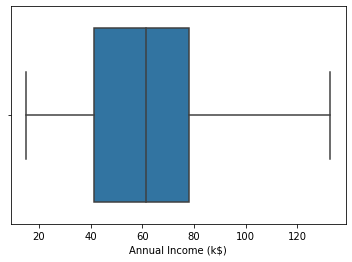

In [18]:
Q1 = ds['Annual Income (k$)'].quantile(0.25)
Q2 = ds['Annual Income (k$)'].quantile(0.75)
IQR = Q2 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q2 +(whisker_width*IQR)
ds['Annual Income (k$)']=np.where(ds['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(ds['Annual Income (k$)']<lower_whisker,lower_whisker,ds['Annual Income (k$)']))
sns.boxplot(x=ds['Annual Income (k$)'])

# 6.Check for Categorical columns and perform encoding.

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [20]:
le=LabelEncoder()
ds['Gender']=le.fit_transform(ds['Gender'])
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# 7.Scaling the data

In [21]:
xscale=ds[["Age","Spending Score (1-100)"]]
x_scaled = preprocessing.scale(xscale)

# 8.Performing Clustering

In [22]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\KHSR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[400.00000000000006,
 189.3874903399244,
 124.32628617921526,
 89.84853511210653,
 71.0936414145941,
 53.142672193834564,
 46.22634035662258,
 39.38346792029827,
 34.15282654855128]

Text(0, 0.5, 'Within-cluster Sum of Squares')

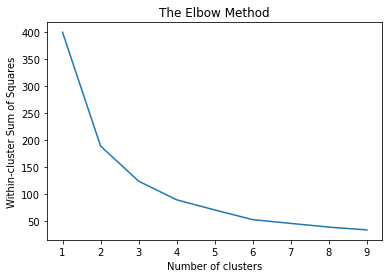

In [23]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [24]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [25]:
data_with_clusters = ds.copy()
data_with_clusters['Clusters'] = kmeans.fit_predict(x_scaled) 
data_with_clusters.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15.0,39,2
1,2,1,21,15.0,81,0
2,3,0,20,16.0,6,2
3,4,0,23,16.0,77,0
4,5,0,31,17.0,40,2


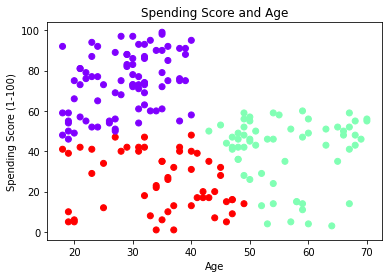

In [26]:
plt.scatter(ds['Age'],ds['Spending Score (1-100)'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Spending Score and Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

# 9.Spliting the data into dependent and independent variables

In [27]:
X=ds.drop(columns=["Annual Income (k$)"],axis=1)
y=ds["Annual Income (k$)"]
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)
X.head()

Shape of x: (200, 4)
Shape of y: (200,)


,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40


In [28]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_scaler = min_max_scaler.fit_transform(X)
print ("\nAfter min max Scaling : \n", x_scaler)


After min max Scaling : 
 [[0.         1.         0.01923077 0.3877551 ]
 [0.00502513 1.         0.05769231 0.81632653]
 [0.01005025 0.         0.03846154 0.05102041]
 [0.01507538 0.         0.09615385 0.7755102 ]
 [0.0201005  0.         0.25       0.39795918]
 [0.02512563 0.         0.07692308 0.76530612]
 [0.03015075 0.         0.32692308 0.05102041]
 [0.03517588 0.         0.09615385 0.94897959]
 [0.04020101 1.         0.88461538 0.02040816]
 [0.04522613 0.         0.23076923 0.7244898 ]
 [0.05025126 1.         0.94230769 0.13265306]
 [0.05527638 0.         0.32692308 1.        ]
 [0.06030151 0.         0.76923077 0.14285714]
 [0.06532663 0.         0.11538462 0.7755102 ]
 [0.07035176 1.         0.36538462 0.12244898]
 [0.07537688 1.         0.07692308 0.79591837]
 [0.08040201 0.         0.32692308 0.34693878]
 [0.08542714 1.         0.03846154 0.66326531]
 [0.09045226 1.         0.65384615 0.28571429]
 [0.09547739 0.         0.32692308 0.98979592]
 [0.10050251 1.         0.3269230

In [29]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(X)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-1.7234121   1.12815215 -1.42456879 -0.43480148]
 [-1.70609137  1.12815215 -1.28103541  1.19570407]
 [-1.68877065 -0.88640526 -1.3528021  -1.71591298]
 [-1.67144992 -0.88640526 -1.13750203  1.04041783]
 [-1.6541292  -0.88640526 -0.56336851 -0.39597992]
 [-1.63680847 -0.88640526 -1.20926872  1.00159627]
 [-1.61948775 -0.88640526 -0.27630176 -1.71591298]
 [-1.60216702 -0.88640526 -1.13750203  1.70038436]
 [-1.5848463   1.12815215  1.80493225 -1.83237767]
 [-1.56752558 -0.88640526 -0.6351352   0.84631002]
 [-1.55020485  1.12815215  2.02023231 -1.4053405 ]
 [-1.53288413 -0.88640526 -0.27630176  1.89449216]
 [-1.5155634  -0.88640526  1.37433211 -1.36651894]
 [-1.49824268 -0.88640526 -1.06573534  1.04041783]
 [-1.48092195  1.12815215 -0.13276838 -1.44416206]
 [-1.46360123  1.12815215 -1.20926872  1.11806095]
 [-1.4462805  -0.88640526 -0.27630176 -0.59008772]
 [-1.42895978  1.12815215 -1.3528021   0.61338066]
 [-1.41163905  1.12815215  0.94373197 -0.82301709]
 [-1

# 10.Spliting the data into training and testing

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (160, 4)
Shape of x_test : (40, 4)
Shape of y_train : (160,)
Shape of y_test : (40,)


# 11.Building,Training and Testing the model

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
model_predict=model.predict(x_test)

# 12.Measuring the performance using Evaluation Metrics.

In [33]:
evalution_method=r2_score(model_predict,y_test)
print(f'r2 score in percentage:{(evalution_method)*100:.2f}%')

r2 score in percentage:98.39%
